In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\admin\Downloads\Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.describe(include="object")

,Gender
count,200
unique,2
top,Female
freq,112


In [9]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.Gender=df.Gender.replace({"Male":0,"Female":1})

In [12]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


In [13]:
df.drop("CustomerID",axis=1,inplace=True)

<AxesSubplot:xlabel='Gender', ylabel='count'>

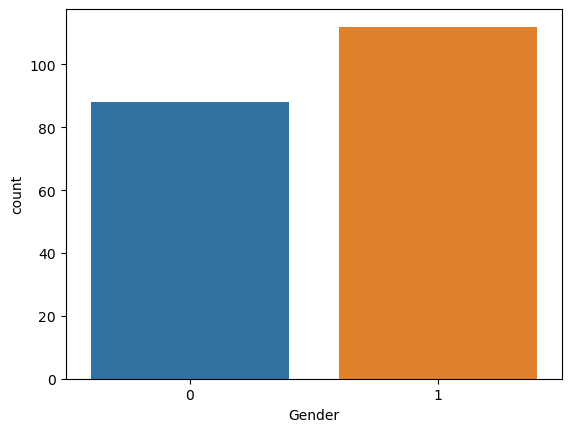

In [14]:
sns.countplot(df.Gender)

<AxesSubplot:>

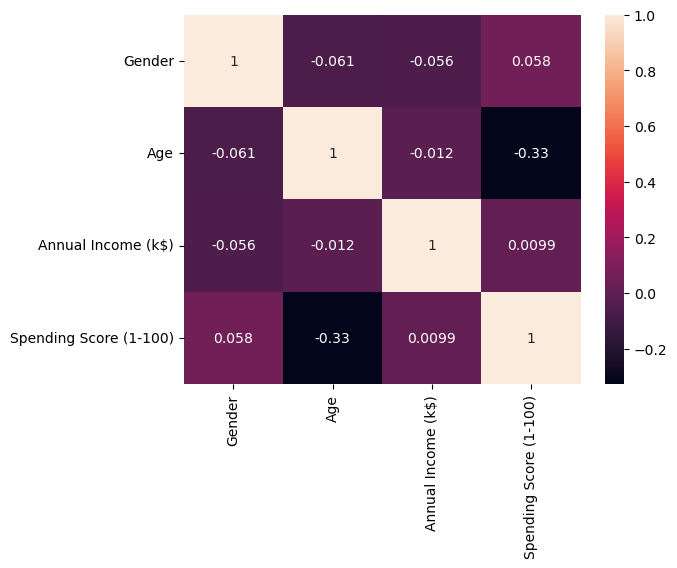

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
df.rename(columns={"Annual Income (k$)":"Annual_Income","Spending Score (1-100)":"Spending_Score"},inplace=True)

In [17]:
df.head()

,Gender,Age,Annual_Income,Spending_Score
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


In [18]:
x=df.query("Gender ==0 ")["Spending_Score"]
y=df.query("Gender ==0 ")["Age"]

<AxesSubplot:xlabel='Age', ylabel='Count'>

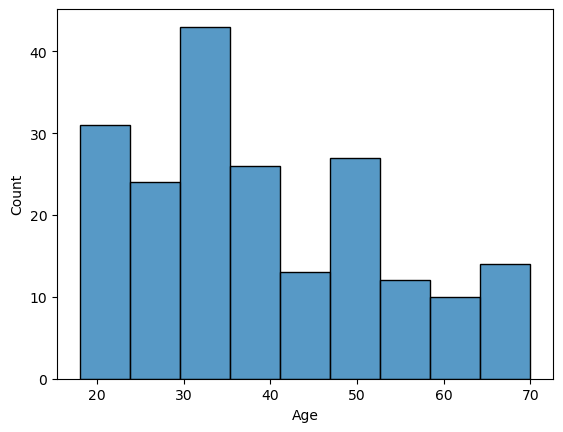

In [19]:
sns.histplot(df.Age)

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [49]:
wcss=[]
sil=[]
n_cluster=range(2,10)
for i in n_cluster:
    kmean=KMeans(n_clusters=i)
    kmean.fit(df)
    wcss.append(kmean.inertia_)
    y_pred=kmean.predict(df)
    sil_score=silhouette_score(df,y_pred)
    sil.append(sil_score)
    

Text(0, 0.5, 'wcss')

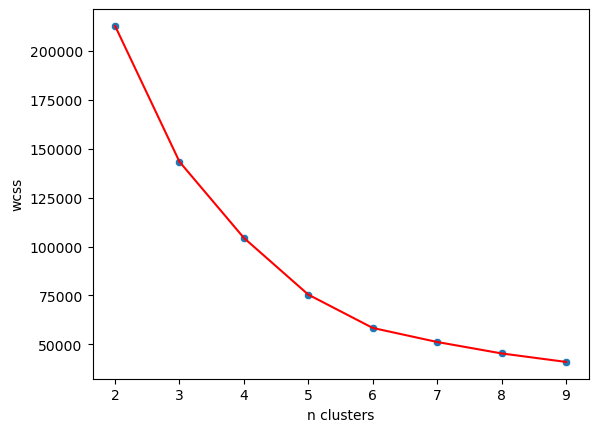

In [50]:
sns.scatterplot(n_cluster,wcss)
plt.plot(n_cluster,wcss,c="red")
plt.xlabel("n clusters")
plt.ylabel("wcss")

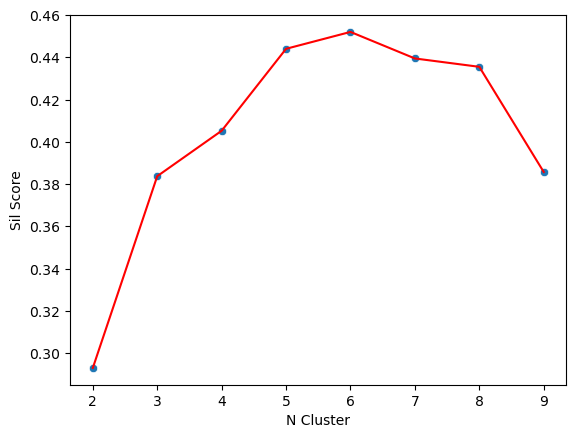

In [51]:
plt.figure()
sns.scatterplot(n_cluster,sil)
sns.lineplot(n_cluster,sil,color = 'red')
plt.xlabel('N Cluster')
plt.ylabel('Sil Score')
plt.show()

In [54]:
cluster=KMeans(n_clusters=6)
cluster.fit(df)
y_pred=cluster.predict(df)

In [58]:
cluster.cluster_centers_  #it has coordinates like Gender-- Age-- Anual_income-- spending score

array([[ 0.42857143, 41.68571429, 88.22857143, 17.28571429],
       [ 0.55555556, 56.15555556, 53.37777778, 49.08888889],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.59090909, 25.27272727, 25.72727273, 79.36363636],
       [ 0.65789474, 27.        , 56.65789474, 49.13157895],
       [ 0.61904762, 44.14285714, 25.14285714, 19.52380952]])

<AxesSubplot:xlabel='Age', ylabel='Annual_Income'>

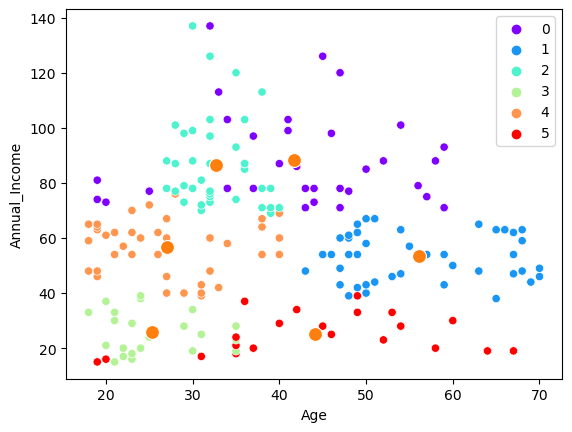

In [60]:
plt.plot()
sns.scatterplot(x="Age",y="Annual_Income",hue=y_pred,data=df,palette="rainbow")
sns.scatterplot(x=cluster.cluster_centers_[:,1],y=cluster.cluster_centers_[:,2],s=100)

In [61]:
scaler=StandardScaler()
df_scale=scaler.fit_transform(df)

In [65]:
wcss=[]
sil=[]
n_clust=range(2,20)
for k in n_clust:
    cluster=KMeans(n_clusters=k)
    cluster.fit(df_scale)
    wcss.append(cluster.inertia_)
    y_pred=cluster.predict(df_scale)
    sil_score=silhouette_score(df_scale,y_pred)
    sil.append(sil_score)

Text(0, 0.5, 'wcss')

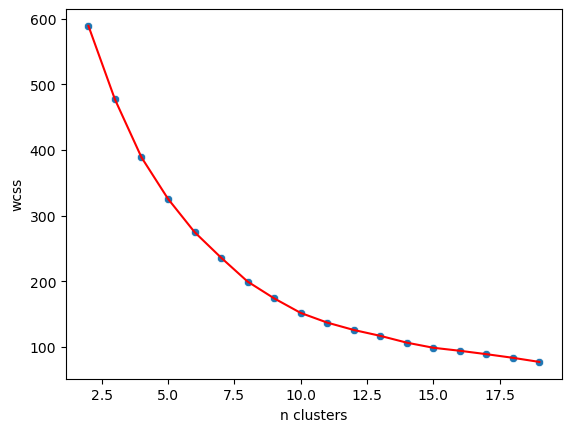

In [66]:
sns.scatterplot(n_clust,wcss)
plt.plot(n_clust,wcss,c="red")
plt.xlabel("n clusters")
plt.ylabel("wcss")

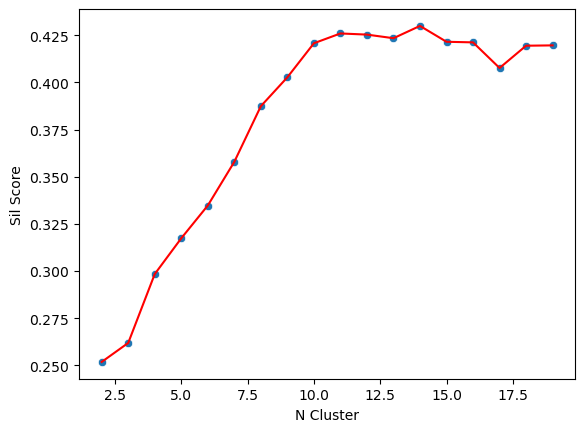

In [67]:
plt.figure()
sns.scatterplot(n_clust,sil)
sns.lineplot(n_clust,sil,color = 'red')
plt.xlabel('N Cluster')
plt.ylabel('Sil Score')
plt.show()